# Project 1 - BBC News Classification

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Importing Data

In [2]:
data = pd.read_csv("D:\Python Data Science\BBC News Classification\BBC News Train.csv")
data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


## Understanding Features & Target Attributes

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [4]:
data['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

## Checking Any Null Values

In [5]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

## Countplot of Target Attribute(Category)

C:\Users\Shivam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot of Category')

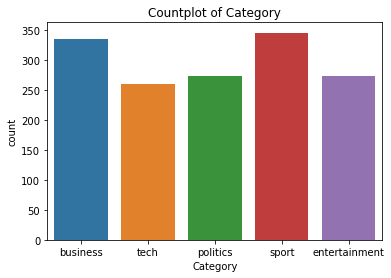

In [6]:
sns.countplot(data.Category).set_title('Countplot of Category')

In [8]:
data['Text_length'] = data['Text'].str.len()
data

,ArticleId,Text,Category,Text_length
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866
1,154,german business confidence slides german busin...,business,2016
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104
3,1976,lifestyle governs mobile choice faster bett...,tech,3618
4,917,enron bosses in $168m payout eighteen former e...,business,2190
...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,1266
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,3111
1487,1590,weak dollar hits reuters revenues at media gro...,business,1370
1488,1587,apple ipod family expands market apple has exp...,tech,3242


## Distribution Plot

C:\Users\Shivam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'News length Distribution')

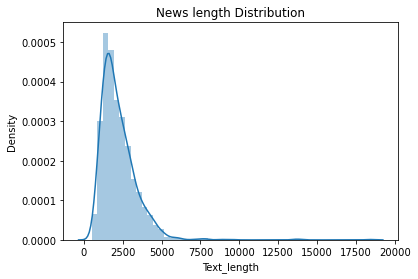

In [9]:
sns.distplot(data.Text_length).set_title('News length Distribution')

## Constructing Wordcloud

In [10]:
def text_wordcloud(words):
    wc = WordCloud(width=800, height=500, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.axis('off')
    plt.imshow(wc, interpolation="bilinear")

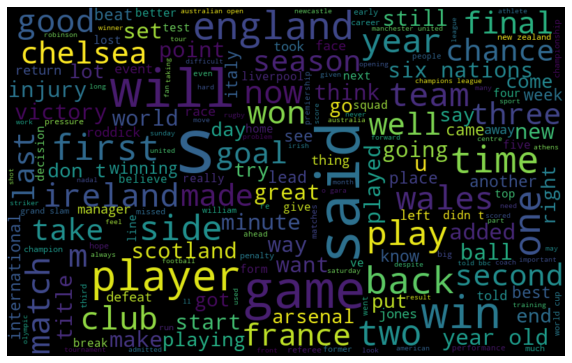

In [11]:
temp_sport = data[data['Category'] == "sport"]
sport_sentences = temp_sport['Text'].tolist()
text = " ".join(sport_sentences)

text_wordcloud(text)

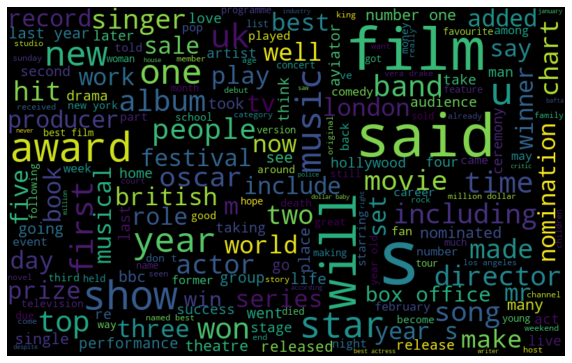

In [12]:
temp_sport = data[data['Category'] == "entertainment"]
entertainment_sentences = temp_sport['Text'].tolist()
text = " ".join(entertainment_sentences)

text_wordcloud(text)

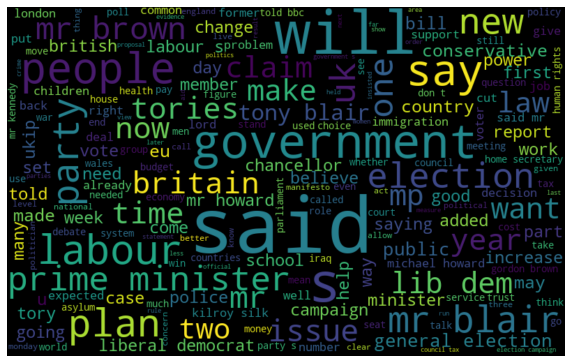

In [13]:
temp_sport = data[data['Category'] == "politics"]
politics_sentences = temp_sport['Text'].tolist()
text = " ".join(politics_sentences)

text_wordcloud(text)

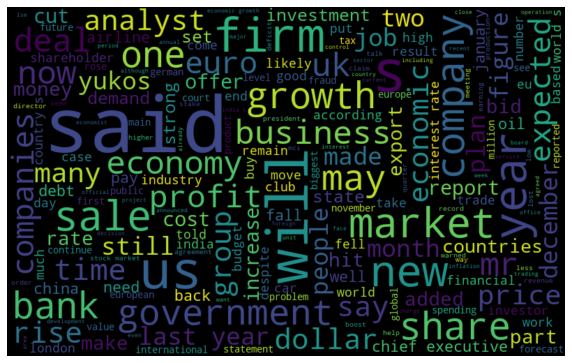

In [14]:
temp_sport = data[data['Category'] == "business"]
business_sentences = temp_sport['Text'].tolist()
text = " ".join(business_sentences)

text_wordcloud(text)

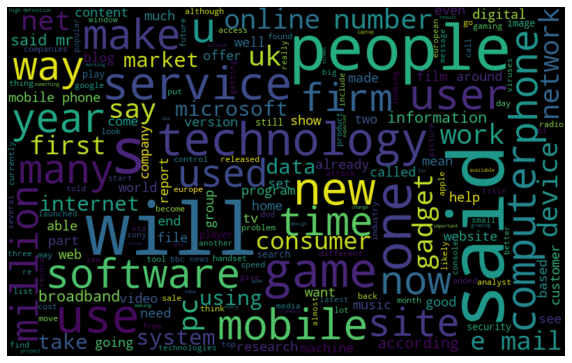

In [15]:
temp_sport = data[data['Category'] == "tech"]
tech_sentences = temp_sport['Text'].tolist()
text = " ".join(tech_sentences)

text_wordcloud(text)

## Data Preprocessing

Removing special characters
- \r
- \n

Removing Punctuations & Stopwords

In [16]:
def preprocess_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ',text)
    text = re.sub(r'[^\w\s]','',text)
    
    mystopwords = set(stopwords.words('english'))
    word_tokenize_output = word_tokenize(text)
    
    temp_word_list = []
    for each_word in word_tokenize_output:
        if each_word not in mystopwords:
            temp_word_list.append(each_word) 
    temp_word_list = " ".join(temp_word_list)
    
    return temp_word_list

In [17]:
data['Cleaned_text'] = data['Text'].apply(preprocess_text)
data['Cleaned_text_length'] = data['Cleaned_text'].str.len()
data

,ArticleId,Text,Category,Text_length,Cleaned_text,Cleaned_text_length
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,1423
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,1508
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,2145
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,2412
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,1581
...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,1266,double eviction big brother model caprice holb...,869
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,3111,dj double act revamp chart show dj duo jk joel...,2080
1487,1590,weak dollar hits reuters revenues at media gro...,business,1370,weak dollar hits reuters revenues media group ...,990
1488,1587,apple ipod family expands market apple has exp...,tech,3242,apple ipod family expands market apple expande...,2273


## Label Encoding

In [18]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Category_target'] = label_encoder.fit_transform(data['Category'])

In [19]:
data

,ArticleId,Text,Category,Text_length,Cleaned_text,Cleaned_text_length,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,1423,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,1508,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,2145,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,2412,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,1581,0
...,...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,1266,double eviction big brother model caprice holb...,869,1
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,3111,dj double act revamp chart show dj duo jk joel...,2080,1
1487,1590,weak dollar hits reuters revenues at media gro...,business,1370,weak dollar hits reuters revenues media group ...,990,0
1488,1587,apple ipod family expands market apple has exp...,tech,3242,apple ipod family expands market apple expande...,2273,4


## Splitting Data in Training Set and Testing Set

In [20]:
x_train,x_test,y_train,y_test = train_test_split(data['Cleaned_text'], data['Category_target'], train_size=0.75, random_state=50)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1117,)
(1117,)
(373,)
(373,)


In [28]:
tfidf = TfidfVectorizer(encoding = 'utf-8',
                        ngram_range = (1,2),
                        max_df = 1.,
                        min_df = 10,
                        max_features = 300,
                        )

features_train = tfidf.fit_transform(x_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(x_test).toarray()
labels_test = y_test
print(features_test.shape)

(1117, 300)
(373, 300)


## Building a Model

## Logistic Regression

In [34]:
lc_model = LogisticRegression()
lc_model.fit(features_train,labels_train)
lc_model_predictions = lc_model.predict(features_test)

print("Accuracy ->", accuracy_score(labels_test,lc_model_predictions))
print(classification_report(labels_test,lc_model_predictions))

Accuracy -> 0.9544235924932976
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        86
           1       0.97      0.97      0.97        62
           2       0.96      0.96      0.96        75
           3       0.97      0.97      0.97        79
           4       0.92      0.93      0.92        71

    accuracy                           0.95       373
   macro avg       0.95      0.95      0.95       373
weighted avg       0.95      0.95      0.95       373



## Decision Tree

In [38]:
dc_model = DecisionTreeClassifier()
dc_model.fit(features_train,labels_train)
dc_model_predictions = dc_model.predict(features_test)

print("Accuracy ->", accuracy_score(labels_test,dc_model_predictions))
print(classification_report(labels_test,dc_model_predictions))

Accuracy -> 0.7855227882037533
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        86
           1       0.85      0.74      0.79        62
           2       0.74      0.77      0.76        75
           3       0.78      0.92      0.84        79
           4       0.91      0.72      0.80        71

    accuracy                           0.79       373
   macro avg       0.80      0.78      0.79       373
weighted avg       0.79      0.79      0.79       373



## Random Forest

In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(features_train,labels_train)
rf_model_predictions = rf_model.predict(features_test)

print("Accuracy ->", accuracy_score(labels_test,rf_model_predictions))
print(classification_report(labels_test,rf_model_predictions))

Accuracy -> 0.9302949061662198
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        86
           1       0.90      0.90      0.90        62
           2       0.93      0.95      0.94        75
           3       0.92      0.97      0.94        79
           4       0.94      0.92      0.93        71

    accuracy                           0.93       373
   macro avg       0.93      0.93      0.93       373
weighted avg       0.93      0.93      0.93       373



## KNeighborsClassifier

In [44]:
kn_model = KNeighborsClassifier()
kn_model.fit(features_train,labels_train)
kn_model_predictions = kn_model.predict(features_test)

print("Accuracy ->", accuracy_score(labels_test,kn_model_predictions))
print(classification_report(labels_test,kn_model_predictions))

Accuracy -> 0.900804289544236
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        86
           1       0.95      0.84      0.89        62
           2       0.84      0.92      0.88        75
           3       0.97      0.95      0.96        79
           4       0.89      0.92      0.90        71

    accuracy                           0.90       373
   macro avg       0.90      0.90      0.90       373
weighted avg       0.90      0.90      0.90       373



##  Naive Bayes 

In [47]:
nb_model = GaussianNB()
nb_model.fit(features_train,labels_train)
nb_model_predictions = nb_model.predict(features_test)

print("Accuracy ->", accuracy_score(labels_test,nb_model_predictions))
print(classification_report(labels_test,nb_model_predictions))

Accuracy -> 0.9088471849865952
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        86
           1       0.87      0.87      0.87        62
           2       0.92      0.93      0.93        75
           3       0.96      0.97      0.97        79
           4       0.88      0.90      0.89        71

    accuracy                           0.91       373
   macro avg       0.91      0.91      0.91       373
weighted avg       0.91      0.91      0.91       373

